In [1]:
# Importing needed libraries:
# Make this a function named acquire.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import os
import env

In [2]:
import acquire
import luke_wrangle

acquire.py functions loaded successfully
wrangle.py functions loaded successfully


In [52]:
df = acquire.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [49]:
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

In [53]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [6]:
df.shape

(21352, 62)

## Data Preparation

In [7]:
# Finding out how many of the columns have at least half of their rows as nulls:

df.isna().sum() > (df.shape[0]/2 + 1000)

id                          False
parcelid                    False
airconditioningtypeid        True
architecturalstyletypeid     True
basementsqft                 True
                            ...  
taxdelinquencyyear           True
censustractandblock         False
propertylandusetypeid       False
logerror                    False
transactiondate             False
Length: 62, dtype: bool

In [55]:
df = df.drop(columns = {'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
                        'taxdelinquencyyear', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet',
                        'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
                        'finishedsquarefeet6', 'fireplacecnt', 'hashottuborspa', 'poolsizesum',
                        'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'threequarterbathnbr',
                        'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories',
                        'fireplaceflag', 'taxdelinquencyflag', 'buildingqualitytypeid', 'garagecarcnt', 'garagetotalsqft', 'poolcnt', 'regionidneighborhood', 'propertyzoningdesc' })

In [56]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,3.0,3.0,3.0,1534.0,NaN,6037.0,3.0,NaN,33981374.0,-118317057.0,5000.0,0300,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.0,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,2.0,3.0,2.0,1458.0,1458.0,6037.0,2.0,2.0,34686163.0,-118113100.0,8284.0,0101,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.0,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,1.0,2.0,1.0,1421.0,1421.0,6037.0,1.0,2.0,33999877.0,-118291863.0,6707.0,0100,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.0,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,3.0,4.0,3.0,2541.0,2541.0,6059.0,3.0,NaN,33694636.0,-117912245.0,4975.0,1,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,NaN,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,2.0,3.0,2.0,1650.0,1650.0,6037.0,2.0,2.0,33985377.0,-118361620.0,7300.0,0100,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.0,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,6.037703e+13,261,-0.325393,2017-06-01


In [10]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   bathroomcnt                   21352 non-null  float64
 3   bedroomcnt                    21352 non-null  float64
 4   calculatedbathnbr             21180 non-null  float64
 5   calculatedfinishedsquarefeet  21297 non-null  float64
 6   finishedsquarefeet12          20369 non-null  float64
 7   fips                          21352 non-null  float64
 8   fullbathcnt                   21180 non-null  float64
 9   heatingorsystemtypeid         13308 non-null  float64
 10  latitude                      21352 non-null  float64
 11  longitude                     21352 non-null  float64
 12  lotsizesquarefeet             19074 non-null  float64
 13  p

<AxesSubplot:>

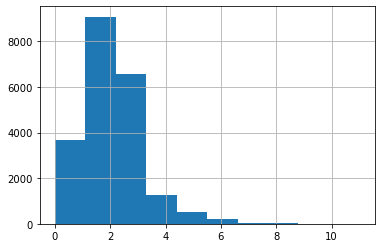

In [12]:
df.bathroomcnt.hist()

<AxesSubplot:>

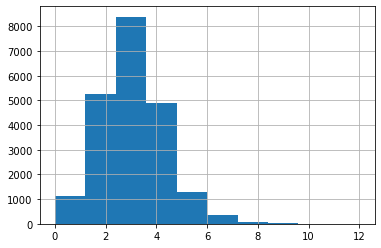

In [14]:
df.bedroomcnt.hist()

In [16]:
2 + 2

4

In [ ]:
# Creating a diaginal heatmap that allows a 

<AxesSubplot:>

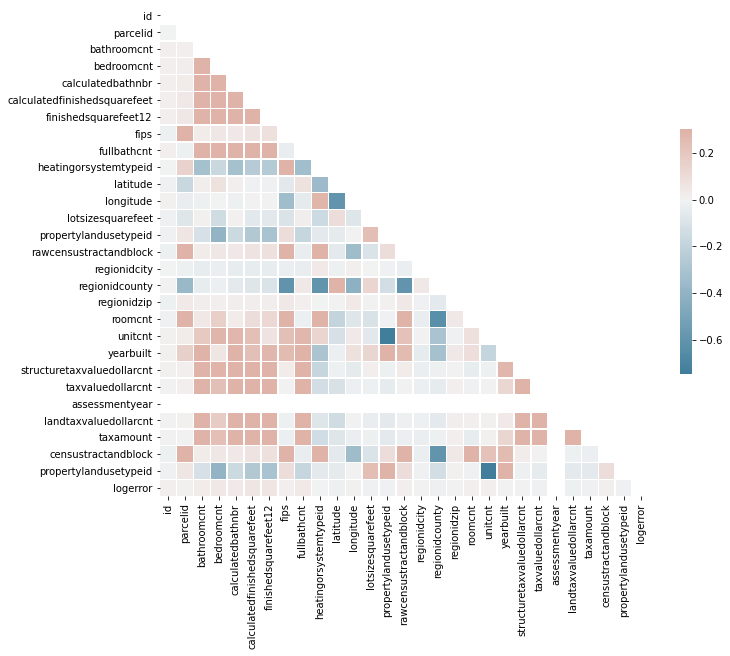

In [17]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   bathroomcnt                   21352 non-null  float64
 3   bedroomcnt                    21352 non-null  float64
 4   calculatedbathnbr             21180 non-null  float64
 5   calculatedfinishedsquarefeet  21297 non-null  float64
 6   finishedsquarefeet12          20369 non-null  float64
 7   fips                          21352 non-null  float64
 8   fullbathcnt                   21180 non-null  float64
 9   heatingorsystemtypeid         13308 non-null  float64
 10  latitude                      21352 non-null  float64
 11  longitude                     21352 non-null  float64
 12  lotsizesquarefeet             19074 non-null  float64
 13  p

In [47]:
print(df.bathroomcnt.isna().sum())
print(df.bedroomcnt.isna().sum())
print(df.calculatedfinishedsquarefeet.isna().sum())

0
0
0


In [ ]:
# For the MVP, these are the 3 features (columns) to focus on. 

<AxesSubplot:>

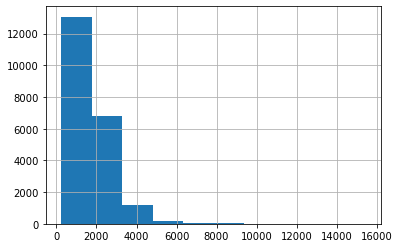

In [44]:
df.calculatedfinishedsquarefeet.hist()

In [45]:
# Let's go with the mean:

df.calculatedfinishedsquarefeet.mean()

1800.4471521810583

In [46]:
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna((df['calculatedfinishedsquarefeet'].mean()))

In [50]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,3.0,3.0,3.0,1534.0,NaN,6037.0,3.0,NaN,33981374.0,-118317057.0,5000.0,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.0,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,2.0,3.0,2.0,1458.0,1458.0,6037.0,2.0,2.0,34686163.0,-118113100.0,8284.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.0,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,1.0,2.0,1.0,1421.0,1421.0,6037.0,1.0,2.0,33999877.0,-118291863.0,6707.0,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.0,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,3.0,4.0,3.0,2541.0,2541.0,6059.0,3.0,NaN,33694636.0,-117912245.0,4975.0,1,261.0,None,6.059064e+07,38032.0,1286.0,96958.0,0.0,NaN,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,2.0,3.0,2.0,1650.0,1650.0,6037.0,2.0,2.0,33985377.0,-118361620.0,7300.0,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.0,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,6.037703e+13,261,-0.325393,2017-06-01


In [ ]:
df_corr = df[['parcelid', 'bathroomcnt', 'bedroomcnt', '']]
df_corr.head()

In [21]:
# Isolating the object columns so I can get a realistic heatmap:

# Creating the mask and if a column is an int/float/object
mask = np.array(df.dtypes == "object")

# Creating the boolean mask:
object_cols = df.iloc[:, mask].columns.tolist()
object_cols

['propertycountylandusecode', 'propertyzoningdesc', 'transactiondate']

In [22]:
numeric_type_cols = df.iloc[:, ~mask].columns.tolist()
numeric_type_cols

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'propertylandusetypeid',
 'logerror']

In [28]:
df_corr = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
# df_corr.drop(columns = {'id', 'logerror'})
df_corr.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,3.0,3.0,1534.0,43439.0
1,2.0,3.0,1458.0,136104.0
2,1.0,2.0,1421.0,35606.0
3,3.0,4.0,2541.0,880456.0
4,2.0,3.0,1650.0,614000.0


Computing correlation


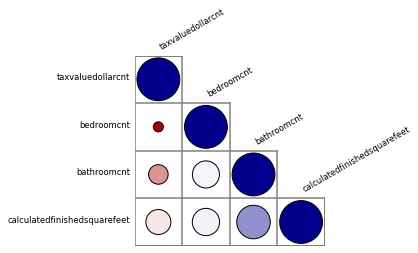

In [39]:
from biokit.viz import corrplot
c = corrplot.Corrplot(df_corr)
c.plot(colorbar=False, method='circle', shrink=.9, lower='circle')